<a href="https://colab.research.google.com/github/00mhk00/DEEP-LEARNING-PROJECTS/blob/master/Hand_Written_CNN_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# mnist (benchmark) dataset
# It is a dataset of handwritten images
# http://yann.lecun.com/exdb/mnist/
# The MNIST database of handwritten digits, available from this page, has a training set of 60,000 examples, 
# and a test set of 10,000 examples. It is a subset of a larger set available from NIST. The digits have been
# size-normalized and centered in a fixed-size image.
# It is a good database for people who want to try learning techniques and pattern recognition methods on real-world 
# data while spending minimal efforts on preprocessing and formatting.'''

In [ ]:
import numpy as np 
import keras  
from keras.datasets import mnist 
from keras.models import Model 
from keras.layers import Dense, Input
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten 
from keras import backend as k 

Using TensorFlow backend.


In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 2s 0us/step


Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)


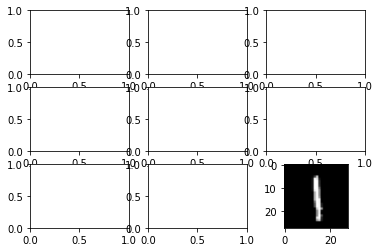

In [ ]:
#Display the dataset
from matplotlib import pyplot
print('Train: X=%s, y=%s' % (x_train.shape, y_train.shape))
print('Test: X=%s, y=%s' % (x_test.shape, y_test.shape))
# plot first few images
for i in range(9):
# define subplot
 pyplot.subplot(330 + 1 + i)
# plot raw pixel data
pyplot.imshow(x_train[i], cmap=pyplot.get_cmap('gray'))
# show the figure\n",
pyplot.show()

In [ ]:
img_rows, img_cols=28, 28
if k.image_data_format() == 'channels_first': 
  #reshape dataset to have a single channel
  x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols) 
  x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols) 
  inpx = (1, img_rows, img_cols) 
else:
  #reshape dataset to have a single channel
  x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1) 
  x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1) 
  inpx = (img_rows, img_cols, 1)

In [ ]:
#convert from integers to floats
x_train = x_train.astype('float32') 
x_test = x_test.astype('float32') 
# Nor. 0 to 1
x_train /= 255
x_test /= 255

In [ ]:
# convert class vectors to binary class matrices  OR one hot encode target values
y_train = keras.utils.to_categorical(y_train) 
y_test = keras.utils.to_categorical(y_test) 

In [ ]:
inpx = Input(shape=inpx) 
layer1 = Conv2D(32, kernel_size=(3, 3), activation='relu')(inpx) 
layer2 = Conv2D(64, (3, 3), activation='relu')(layer1) 
layer3 = MaxPooling2D(pool_size=(3, 3))(layer2) 
# To prevent overfitting 
layer4 = Dropout(0.5)(layer3)
layer5 = Flatten()(layer4) 
layer6 = Dense(250, activation='sigmoid')(layer5) 
layer7 = Dense(10, activation='softmax')(layer6)

In [ ]:
model = Model([inpx], layer7) 
model.compile(optimizer=keras.optimizers.Adadelta(),loss=keras.losses.categorical_crossentropy,metrics=['accuracy'])
model.fit(x_train, y_train, epochs=12, batch_size=500) 

Epoch 1/12
60000/60000 [==============================] - 122s 2ms/step - loss: 2.3107 - accuracy: 0.1041
Epoch 2/12
60000/60000 [==============================] - 121s 2ms/step - loss: 2.3064 - accuracy: 0.1048
Epoch 3/12
60000/60000 [==============================] - 121s 2ms/step - loss: 2.3066 - accuracy: 0.1063
Epoch 4/12
60000/60000 [==============================] - 120s 2ms/step - loss: 2.3070 - accuracy: 0.1052
Epoch 5/12
60000/60000 [==============================] - 125s 2ms/step - loss: 2.3068 - accuracy: 0.1045
Epoch 6/12
60000/60000 [==============================] - 122s 2ms/step - loss: 2.3070 - accuracy: 0.1047
Epoch 7/12
60000/60000 [==============================] - 121s 2ms/step - loss: 2.3066 - accuracy: 0.1075
Epoch 8/12
60000/60000 [==============================] - 121s 2ms/step - loss: 2.3061 - accuracy: 0.1067
Epoch 9/12
60000/60000 [==============================] - 120s 2ms/step - loss: 2.3049 - accuracy: 0.1058
Epoch 10/12
60000/60000 [=====================

In [ ]:
score = model.evaluate(x_test, y_test, verbose=0) 
print('loss=', score[0]) 
print('accuracy=', score[1])

In [ ]:
#sinle Value predication in number
predictions = model.predict(x_test)
print(np.argmax(np.round(predictions[2])))

In [1]:
#sinle Value predication in graph (plot)
import matplotlib.pyplot as plt
plt.imshow(x_test[2].reshape(28, 28), cmap = plt.cm.binary)
plt.show()

NameError: ignored